In [ ]:
# download the required dataset from kaggle 

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download -d bharatsahu/speech-commands-classification-dataset

 99% 1.37G/1.38G [00:11<00:00, 124MB/s]
100% 1.38G/1.38G [00:11<00:00, 124MB/s]


In [ ]:
!unzip /content/speech-commands-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: wow/d9d6559e_nohash_0.wav  
  inflating: wow/d9d6559e_nohash_1.wav  
  inflating: wow/da4ef063_nohash_0.wav  
  inflating: wow/da584bc0_nohash_0.wav  
  inflating: wow/da5dadb9_nohash_0.wav  
  inflating: wow/da76aa58_nohash_0.wav  
  inflating: wow/da76aa58_nohash_1.wav  
  inflating: wow/da76aa58_nohash_2.wav  
  inflating: wow/dabf67d9_nohash_0.wav  
  inflating: wow/dabf67d9_nohash_1.wav  
  inflating: wow/dabf67d9_nohash_2.wav  
  inflating: wow/daf230ac_nohash_0.wav  
  inflating: wow/db43cd03_nohash_0.wav  
  inflating: wow/db72a474_nohash_0.wav  
  inflating: wow/db79a764_nohash_0.wav  
  inflating: wow/db7c95b0_nohash_0.wav  
  inflating: wow/db9cd41d_nohash_0.wav  
  inflating: wow/dbaf8fc6_nohash_0.wav  
  inflating: wow/dbaf8fc6_nohash_1.wav  
  inflating: wow/dbb40d24_nohash_0.wav  
  inflating: wow/dc2222d7_nohash_0.wav  
  inflating: wow/dc269564_nohash_0.wav  
  inflating: wow/dc6e9c04_nohash_0.wav  
  infl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf
import os, random, librosa
from tqdm.auto import tqdm
from IPython import display
import tensorflow as tf
from tensorflow.keras import layers, models, utils, callbacks
from keras.preprocessing.image import ImageDataGenerator
sns.set_style('darkgrid')

In [ ]:
class config:
    CLASSES = np.array(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',
                        'bed','bird','cat','dog','down','go','happy','house','left','marvin','no'
                        ,'off','on','right','sheila','stop','tree','up','wow','yes'])
    MAX_EPOCHS = 500


# Data Preparation
These audio files are 1 sec long and have a sample rate 16000 ie the audio is sampled 16000 times per second. `read_and_pad_sound_wave` function readds the sound file and ensures the length of the file is consistent (1sec in this case) and returns the signal along with its sample rate

We'll convert the waveform into a mel spectrogram, which shows frequency changes over time and can be represented as a 2D image, which will be used as an input to the CNN, `sound_wave_to_mel_spectrogram` converts an audio into a mel spectrogram of the required dimesnsions


In [ ]:
def read_and_pad_sound_wave(filepath, audio_length=16000):
    waveform, sr = sf.read(filepath)
    zero_padding = np.zeros([audio_length - len(waveform)])
    waveform = np.concatenate([waveform, zero_padding], 0)
    return waveform, sr

def sound_wave_to_mel_spectrogram(sound_wave, sample_rate, spec_h=128, spec_w=128, length=1):
    NUM_MELS = spec_h
    HOP_LENGTH = int(sample_rate * length / (spec_w - 1)) 
    mel_spec = librosa.feature.melspectrogram(y=sound_wave, sr=sample_rate, hop_length=HOP_LENGTH, n_mels=NUM_MELS)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

class_distribution = []
spectrogram_samples = []
audio_samples = []

ROOT = '/content'
DATA = 'mel_spectrograms'
if not os.path.exists(DATA):
    os.mkdir(DATA)
      
for label in tqdm(config.CLASSES):
    src_dir = os.path.join(ROOT, label)
    dst_dir = os.path.join(DATA, label)
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)
        
    for i, filename in enumerate(os.listdir(src_dir)[:1500]):
        class_distribution.append(label)
        src_path = os.path.join(src_dir, filename)
        dst_path = f"{os.path.join(dst_dir, filename[:-4])}.png"
        plt.imsave(dst_path, sound_wave_to_mel_spectrogram(*read_and_pad_sound_wave(src_path)), cmap='gray')
        if i == 0:
            spectrogram_samples.append(dst_path)
            audio_samples.append(src_path)
print('done')    

  0%|          | 0/30 [00:00<?, ?it/s]

sr=16000
mel_spectrograms/zero/3477fab6_nohash_0.png
sr=16000
mel_spectrograms/zero/39999a0f_nohash_1.png
sr=16000
mel_spectrograms/zero/86402da1_nohash_0.png
sr=16000
mel_spectrograms/zero/b5552931_nohash_2.png
sr=16000
mel_spectrograms/zero/742d6431_nohash_4.png
sr=16000
mel_spectrograms/zero/c948d727_nohash_3.png
sr=16000
mel_spectrograms/zero/953fe1ad_nohash_4.png
sr=16000
mel_spectrograms/zero/fe291fa9_nohash_0.png
sr=16000
mel_spectrograms/zero/656e8bb3_nohash_1.png
sr=16000
mel_spectrograms/zero/656e8bb3_nohash_0.png
sr=16000
mel_spectrograms/zero/5ba724a7_nohash_0.png
sr=16000
mel_spectrograms/zero/3e31dffe_nohash_4.png
sr=16000
mel_spectrograms/zero/257e17e0_nohash_1.png
sr=16000
mel_spectrograms/zero/ed3c2d05_nohash_1.png
sr=16000
mel_spectrograms/zero/012c8314_nohash_1.png
sr=16000
mel_spectrograms/one/fc2411fe_nohash_1.png
sr=16000
mel_spectrograms/one/d4d898d7_nohash_1.png
sr=16000
mel_spectrograms/one/b5552931_nohash_2.png
sr=16000
mel_spectrograms/one/11a022ba_nohash_0.p

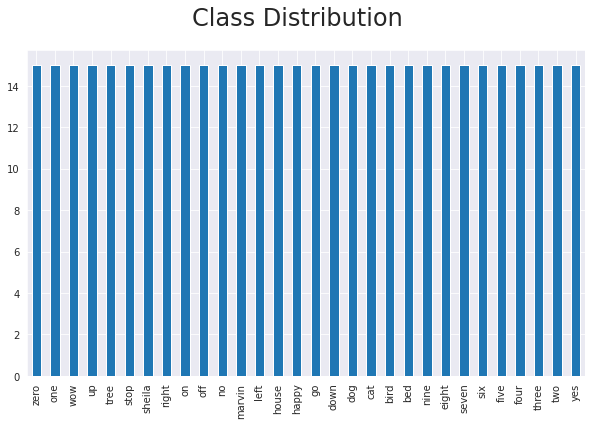

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
pd.Series(class_distribution).value_counts().plot.bar()
fig.suptitle('Class Distribution', fontsize=24);

# Sample Audio

In [ ]:
for i in range(len(config.CLASSES)):
    display.display(display.Audio(read_and_pad_sound_wave(audio_samples[i])[0], rate=16000))

sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000


sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000
sr=16000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

sr=16000
sr=16000
sr=16000


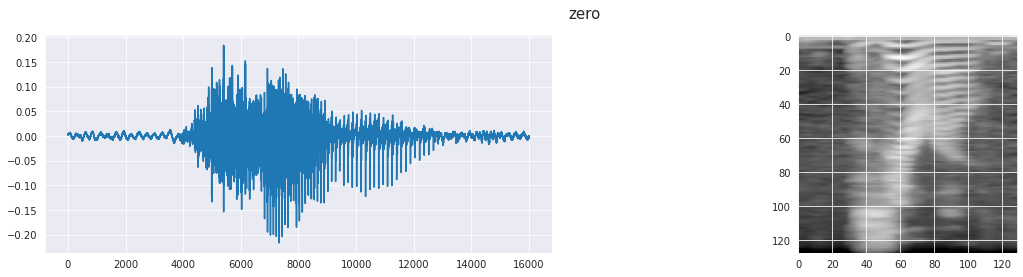

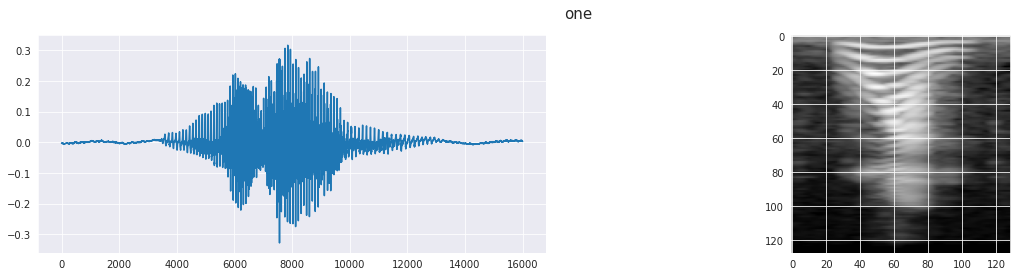

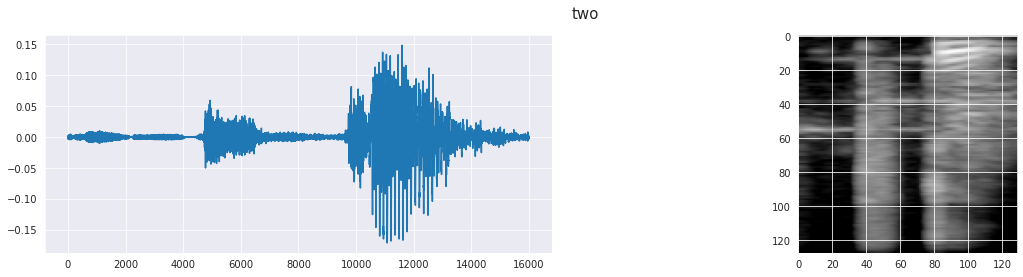

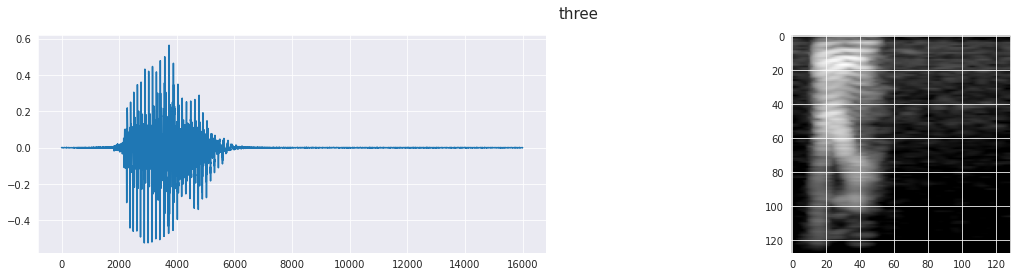

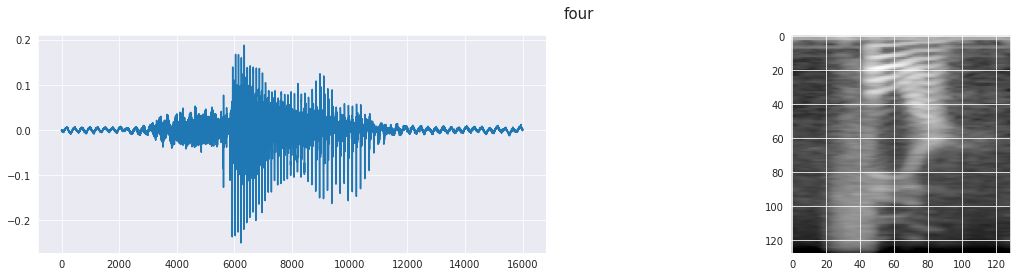

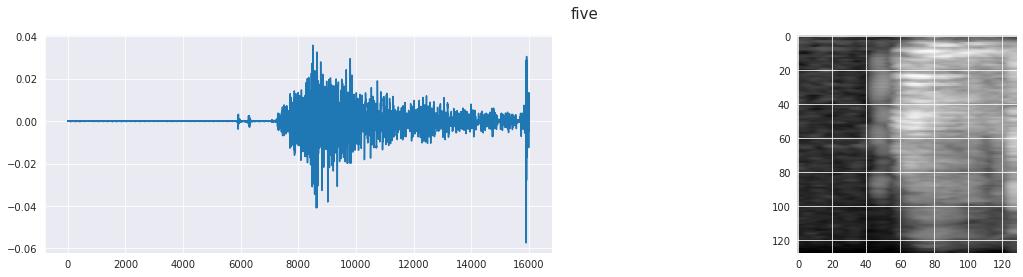

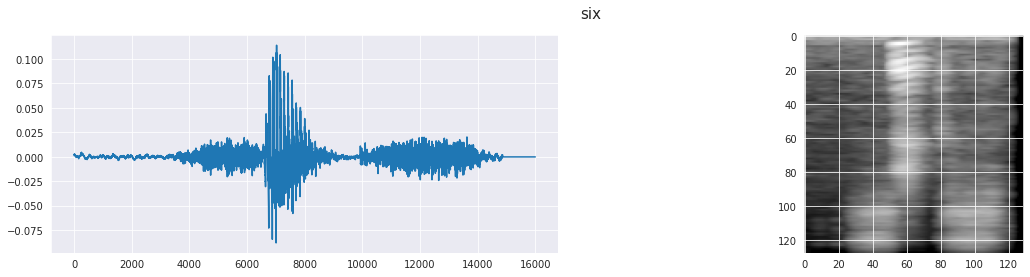

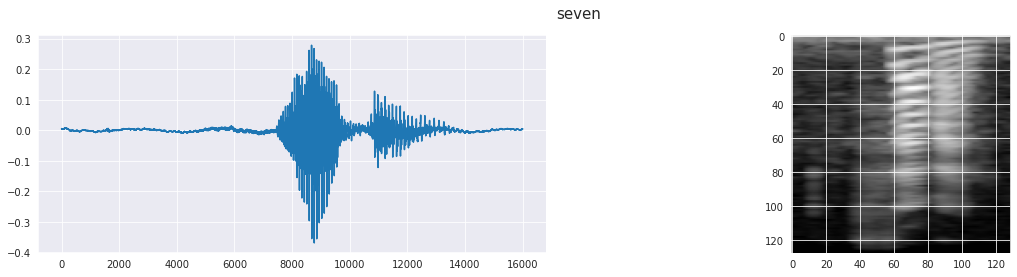

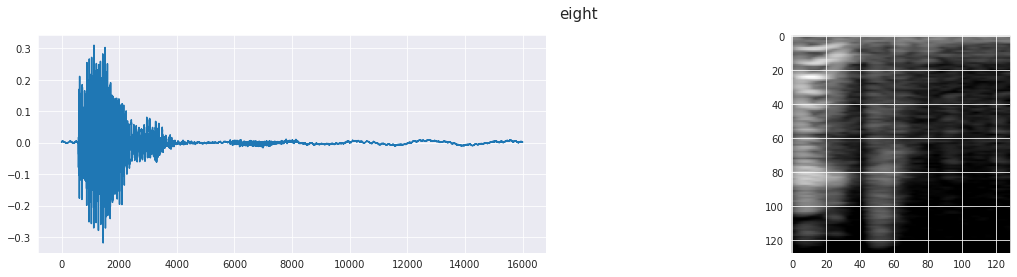

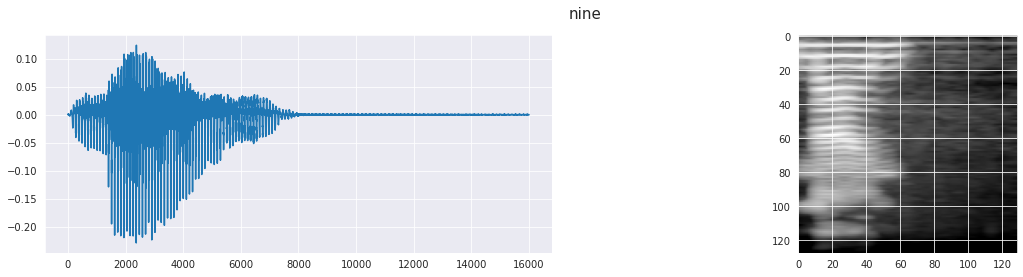

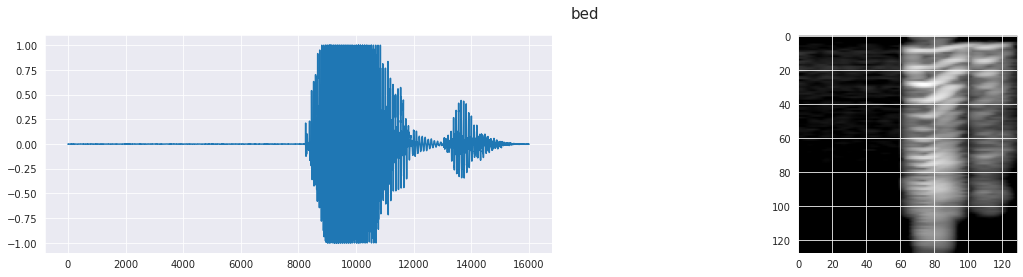

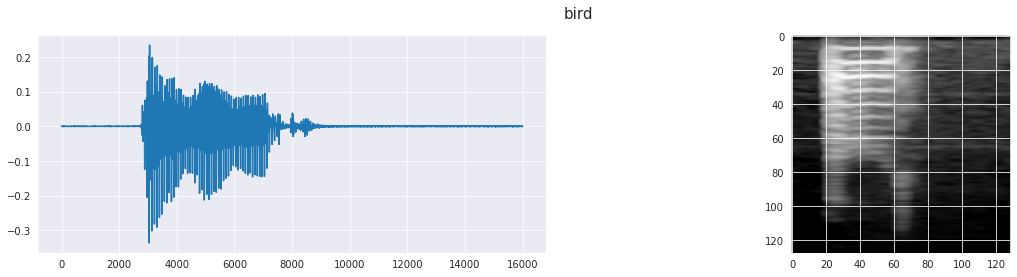

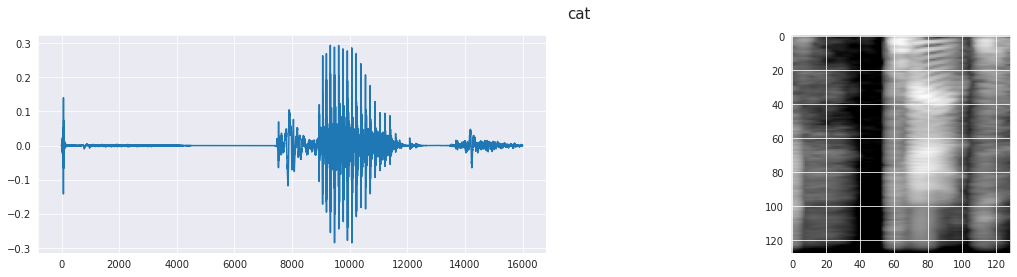

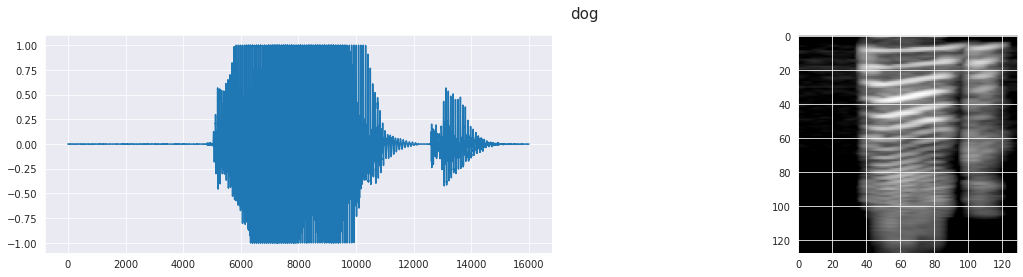

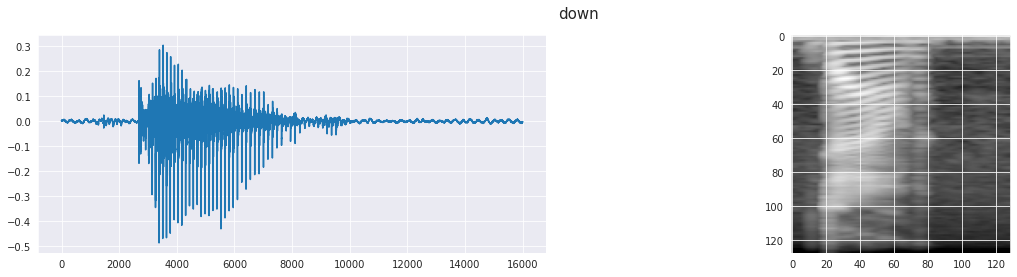

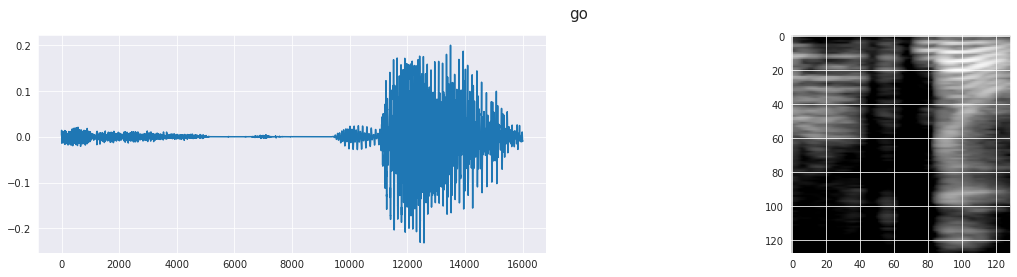

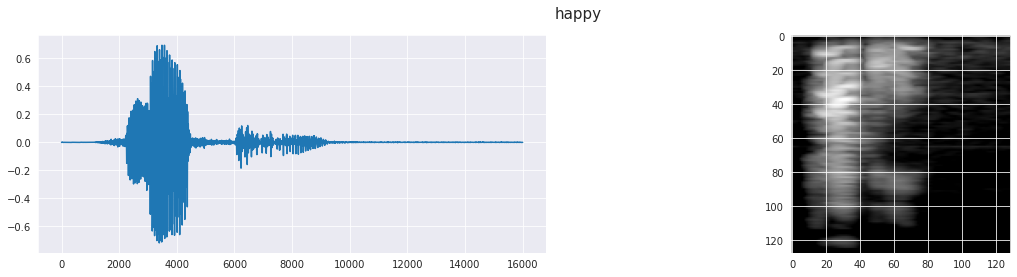

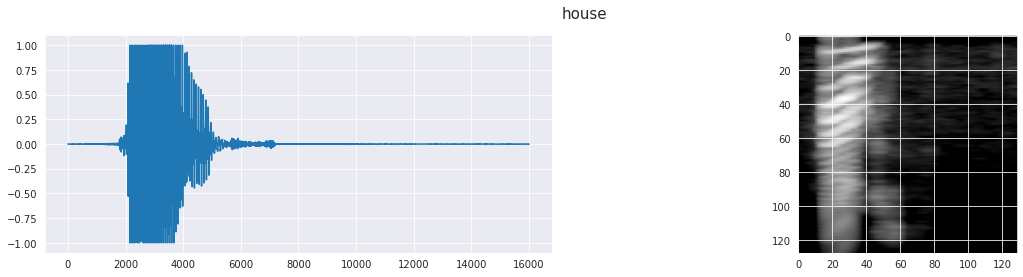

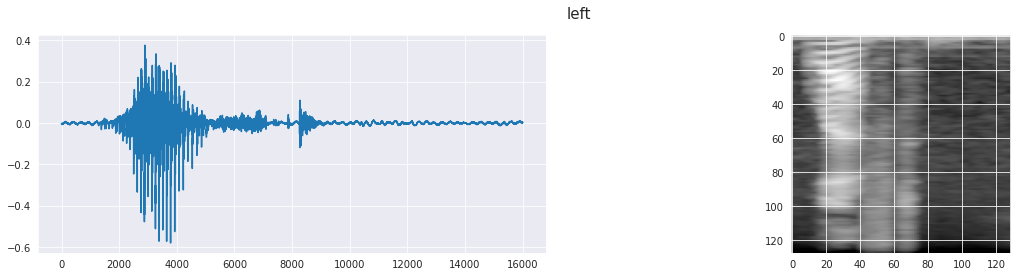

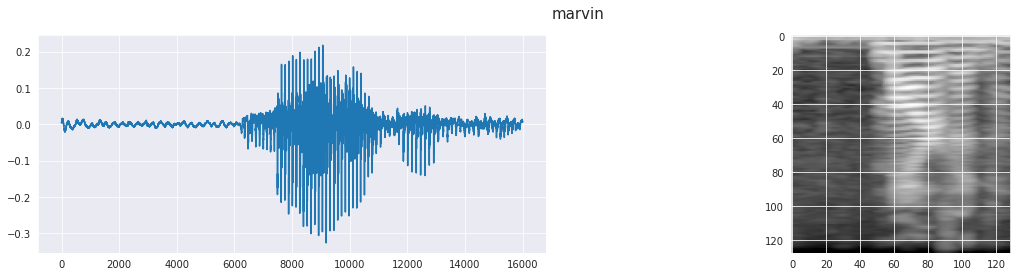

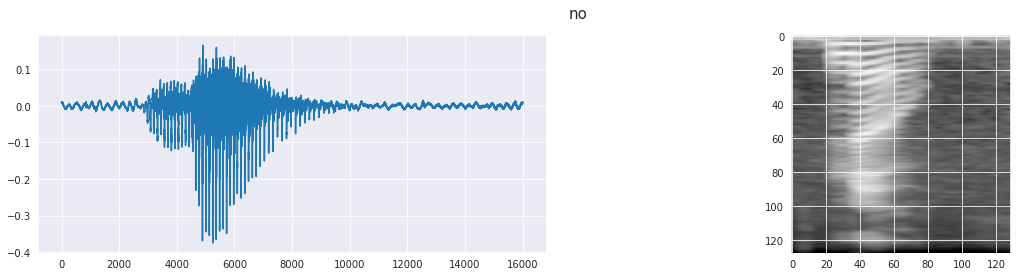

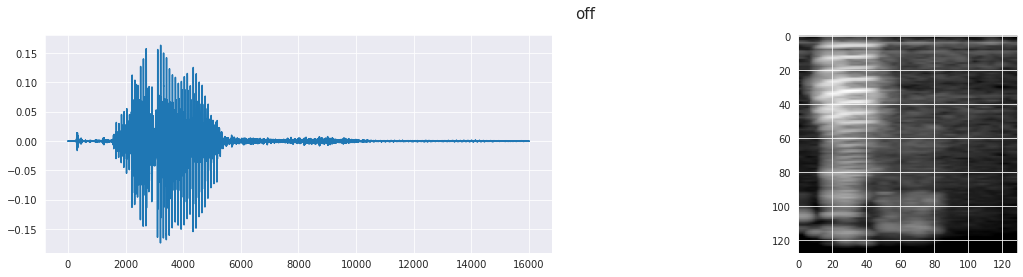

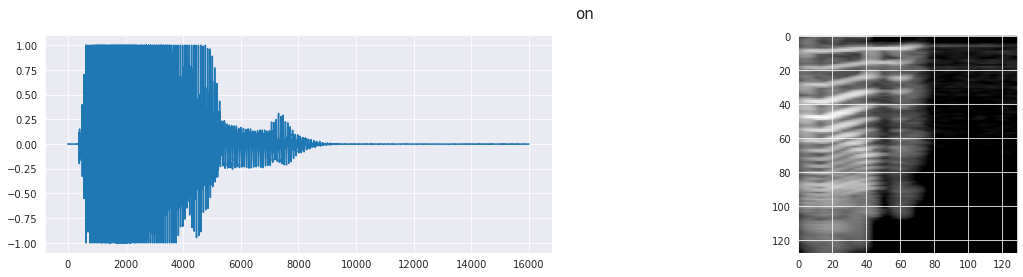

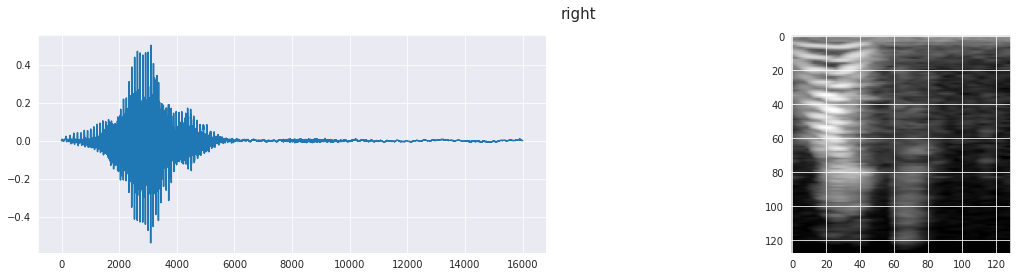

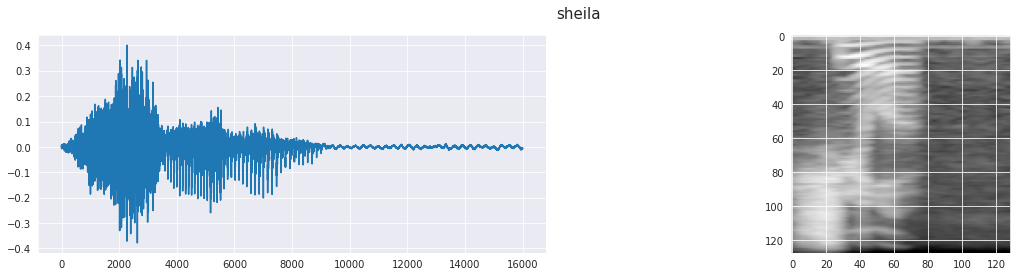

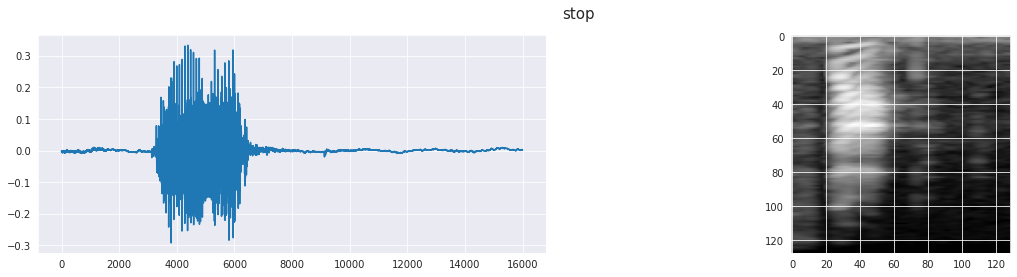

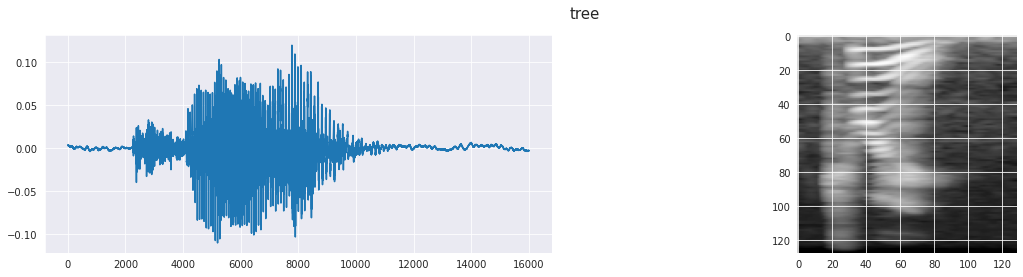

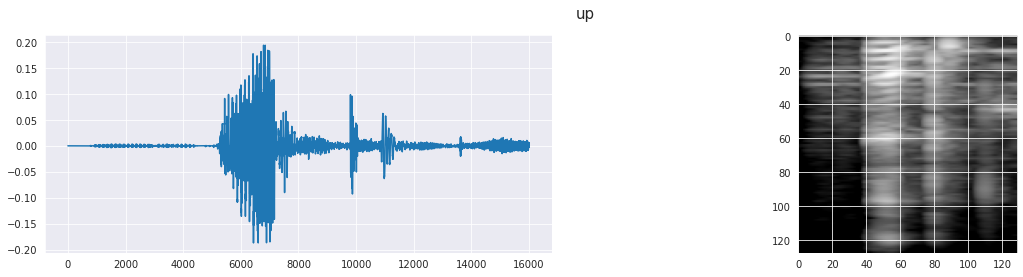

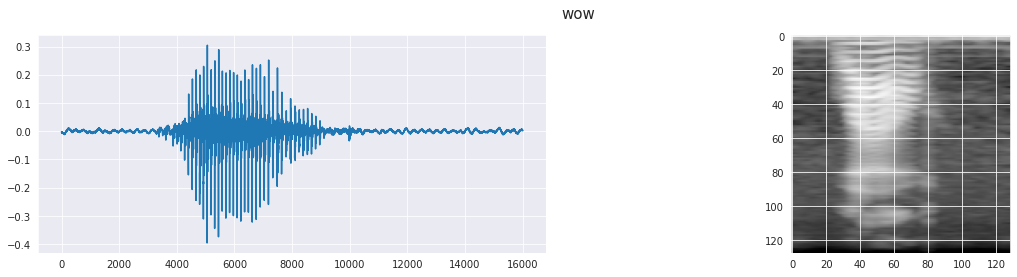

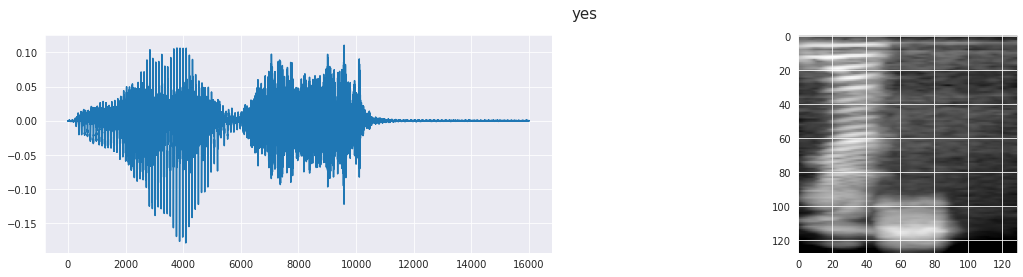

In [ ]:
for i in range(len(config.CLASSES)):
    fig, ax = plt.subplots(1,2, figsize=(20, 4))
    ax[0].plot(read_and_pad_sound_wave(audio_samples[i])[0])
    ax[1].imshow(plt.imread(spectrogram_samples[i]), cmap='gray')
    fig.suptitle(config.CLASSES[i], fontsize=15);

# Data Generator

In [ ]:
image_size = (128, 128, 1)
datagen = ImageDataGenerator(validation_split=0.1)

training_set = datagen.flow_from_directory(
    DATA, target_size=image_size[:2],  batch_size=32, class_mode='categorical', color_mode='grayscale', subset='training'
)
validation_set = datagen.flow_from_directory(
    DATA, target_size=image_size[:2],  batch_size=32, class_mode='categorical', color_mode='grayscale', subset='validation'
)

Found 4927 images belonging to 30 classes.
Found 547 images belonging to 30 classes.


In [ ]:
x,y=validation_set.next()

In [ ]:
x.shape

(32, 128, 128, 1)

# Modellling

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=image_size, padding='same'),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(padding='same'),
    layers.Dropout(0.25),
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(config.CLASSES), activation='softmax'),
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                        

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, 3, input_shape=image_size, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    layers.Conv2D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    layers.MaxPooling2D(padding='same'),
    # layers.Dropout(0.25),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    layers.MaxPooling2D(padding='same'),
    # layers.Dropout(0.25),
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(config.CLASSES), activation='softmax'),
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 128, 128, 32)     

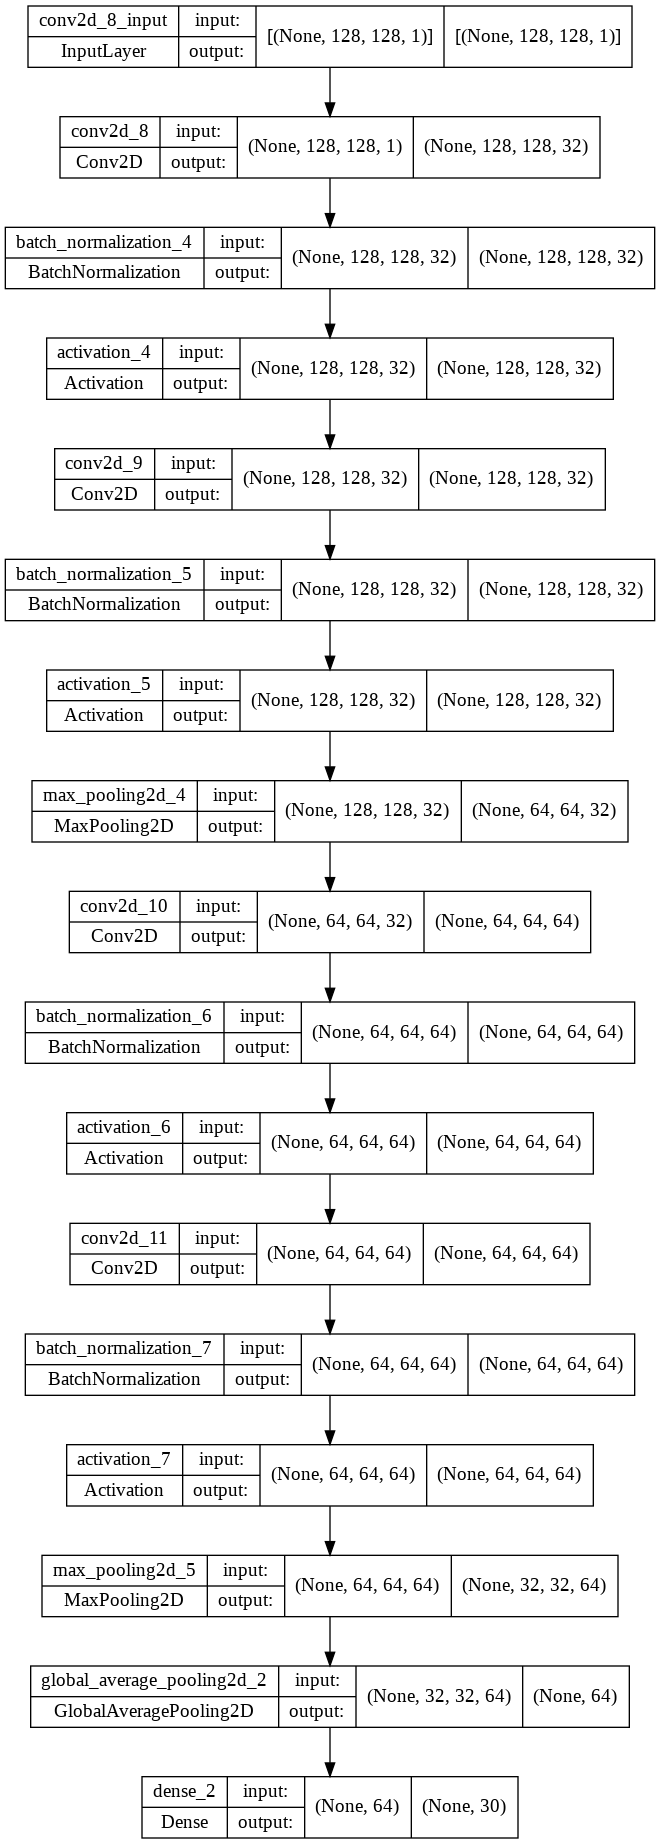

In [ ]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

In [ ]:
model.compile(optimizer='adam',loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
# save the best model based on the validation loss
save_best_model_collback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/model", save_best_only=True
)

In [ ]:
model.fit(training_set,validation_data=(validation_set),epochs=100, callbacks=[save_best_model_collback])

Epoch 1/100
1266/1266 [==============================] - 64s 50ms/step - loss: 2.6562 - acc: 0.2920 - val_loss: 3.4660 - val_acc: 0.1558
Epoch 2/100
1266/1266 [==============================] - 60s 48ms/step - loss: 1.5175 - acc: 0.6346 - val_loss: 2.2450 - val_acc: 0.3587
Epoch 3/100
1266/1266 [==============================] - 61s 48ms/step - loss: 0.9994 - acc: 0.7606 - val_loss: 1.9644 - val_acc: 0.4604
Epoch 4/100
1266/1266 [==============================] - 62s 49ms/step - loss: 0.7655 - acc: 0.8113 - val_loss: 0.9569 - val_acc: 0.7136
Epoch 5/100
1266/1266 [==============================] - 59s 47ms/step - loss: 0.6416 - acc: 0.8381 - val_loss: 2.2214 - val_acc: 0.4351
Epoch 6/100
1266/1266 [==============================] - 59s 47ms/step - loss: 0.5613 - acc: 0.8568 - val_loss: 1.2229 - val_acc: 0.6538
Epoch 7/100
1266/1266 [==============================] - 60s 48ms/step - loss: 0.5073 - acc: 0.8677 - val_loss: 0.7576 - val_acc: 0.7742
Epoch 8/100
1266/1266 [==================

In [ ]:
## plot the overfitting
plt.plot(model.history.history['loss'],label='train')
plt.plot(model.history.history['val_loss'],label='test')
plt.legend()
plt.show()


In [ ]:
loss,acc=model.evaluate(validation_set,verbose=2)

##check the test in prediction

In [ ]:
CLASSES=['bed','bird','cat','dog','down','eight','five','four','go','happy','house','left','marvin',
         'nine','no','off','on','one','right','seven','sheila','six','stop','three','tree'
         ,'two','up','wow','yes','zero']

In [ ]:
x_test,y_test =validation_set.next()

In [ ]:
x_test.shape,y_test.shape

In [ ]:
y_true=tf.argmax(y_test,axis=-1).numpy()
for i in y_true:
    print(CLASSES[i],end=" , ")

In [ ]:
pred=tf.argmax(model.predict(x_test),axis=-1).numpy()
for n in pred:
    print(CLASSES[n] , end=" , ")

# Display a confusion matrix

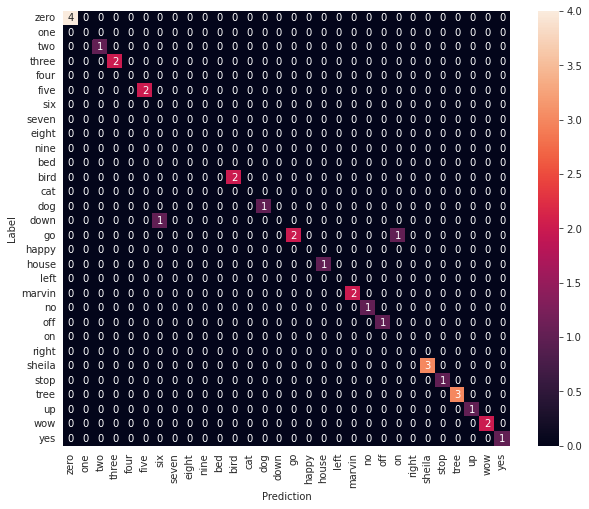

In [ ]:
import seaborn as sns
confusion_mtx = tf.math.confusion_matrix(y_true, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=config.CLASSES,
            yticklabels=config.CLASSES,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
model = tf.keras.models.load_model(filepath="/content/model")


In [ ]:
model.save('speech_comand_model.h5')

NameError: ignored

# Load the model

In [ ]:
model = tf.keras.models.load_model('/speech_comand_model.h5')

In [ ]:
loss,acc=model.evaluate(validation_set,verbose=2)

5/5 - 3s - loss: 0.3398 - acc: 0.9007 - 3s/epoch - 528ms/step


# check test in prediction

In [ ]:
x_test,y_test =validation_set.next()

In [ ]:
y_true=tf.argmax(y_test,axis=-1).numpy()
for i in y_true:
    print(CLASSES[i],end=" , ")

yes , yes , yes , six , yes , yes , yes , yes , yes , yes , yes , yes , yes , yes , yes , yes , yes , left , yes , happy , yes , yes , yes , yes , yes , right , yes , yes , yes , go , yes , four , 

In [ ]:
pred=tf.argmax(model.predict(x_test),axis=-1).numpy()
for n in pred:
    print(CLASSES[n] , end=" , ")

yes , yes , yes , six , yes , yes , yes , yes , yes , yes , yes , yes , down , one , yes , yes , yes , left , yes , one , yes , yes , yes , yes , yes , right , yes , yes , yes , go , yes , four , 

# Display a confusion matrix

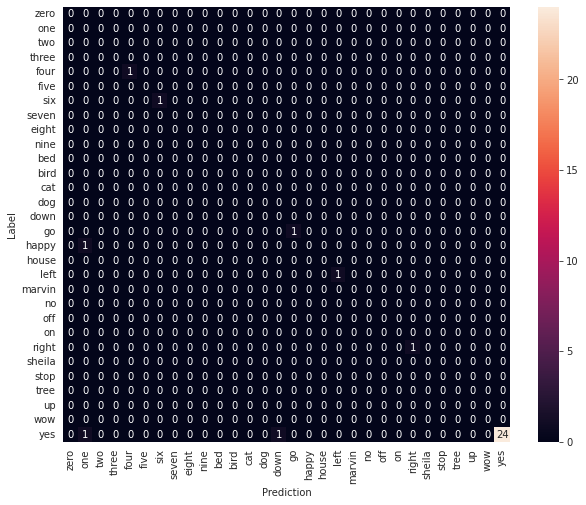

In [ ]:
import seaborn as sns
confusion_mtx = tf.math.confusion_matrix(y_true, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=config.CLASSES,
            yticklabels=config.CLASSES,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Gradio prediction


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input


In [ ]:

  
def read_and_pad_sound_wave(audio, audio_length=16000):
    sr, waveform = audio
   
    trimmed_audio=waveform/np.max(waveform)
    trimmed_audio=librosa.resample(trimmed_audio,48000,16000)

    trimmed_audio,sample_trimmed=librosa.effects.trim(trimmed_audio,top_db=36.3)
    sr=16000
    if len(trimmed_audio)<sr :
        zero_padding = np.zeros([sr - len(trimmed_audio)])
        trimmed_audio = np.concatenate([trimmed_audio, zero_padding], 0)
   
    elif len(trimmed_audio)>sr:
        trimmed_audio=trimmed_audio[-sr:]
    plt.plot(trimmed_audio)

    print(display.display(display.Audio(trimmed_audio, rate=16000)))
    return trimmed_audio, 16000

def sound_wave_to_mel_spectrogram(sound_wave, sample_rate, spec_h=128, spec_w=128, length=1):
    NUM_MELS = spec_h
    HOP_LENGTH = int(sample_rate * length / (spec_w - 1)) 
    mel_spec = librosa.feature.melspectrogram(y=sound_wave, sr=sample_rate, hop_length=HOP_LENGTH, n_mels=NUM_MELS)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

def get_gradio(audio):
    spectrogram_samples = []
  
    dst_dir='/content/gradio_spectrograms'
    dst_path = f"{os.path.join(dst_dir, '101')}.png"

    plt.imsave(dst_path, sound_wave_to_mel_spectrogram(*read_and_pad_sound_wave(audio)), cmap='gray')
   

    spectrogram_samples.append(dst_path)


    wav,b=read_and_pad_sound_wave(audio)


    my_image = load_img(spectrogram_samples[0], target_size=(128, 128),color_mode="grayscale")

    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))

    my_image.shape
    x=my_image
    pred=tf.argmax(model.predict(x),axis=-1).numpy()
    for n in pred:
        print(CLASSES[n] , end=" , ")
    return CLASSES[n]
  

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Your interface requires microphone or webcam permissions - this may cause issues in Colab. Use the External URL in case of issues.
Running on public URL: https://13766.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


None


None
stop , 

None


None
dog , 

None


None
bed , 

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 260, in run_predict
    fn_index, raw_input, username, session_state
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 687, in process_api
    predictions, duration = await self.call_function(fn_index, inputs)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 605, in call_function
    block_fn.fn, *processed_input, limiter=self.limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-247-836be9550bb7>", line 36, in get_gradio
    plt.imsave(dst_path, soun

None


None
up , 

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 260, in run_predict
    fn_index, raw_input, username, session_state
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 687, in process_api
    predictions, duration = await self.call_function(fn_index, inputs)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 605, in call_function
    block_fn.fn, *processed_input, limiter=self.limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-247-836be9550bb7>", line 36, in get_gradio
    plt.imsave(dst_path, soun

None


None
up , 

None


None
down , 

None


None
marvin , 

None


None
stop , 

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 260, in run_predict
    fn_index, raw_input, username, session_state
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 687, in process_api
    predictions, duration = await self.call_function(fn_index, inputs)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 605, in call_function
    block_fn.fn, *processed_input, limiter=self.limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-247-836be9550bb7>", line 36, in get_gradio
    plt.imsave(dst_path, soun

None


None
bed , 

None


None
sheila , 

None


None
one , 

None


None
one , 

None


None
two , 

None


None
three , 

None


None
three , 

None


None
on , 

None


None
four , 

None


None
five , 

None


None
happy , 

None


None
six , 

None


None
seven , 

None


None
stop , 

None


None
marvin , 

None


None
sheila , 

None


None
marvin , 

None


None
marvin , 

None


None
zero , 

None


None
one , 

None


None
two , 

None


None
two , 

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 260, in run_predict
    fn_index, raw_input, username, session_state
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 687, in process_api
    predictions, duration = await self.call_function(fn_index, inputs)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 605, in call_function
    block_fn.fn, *processed_input, limiter=self.limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-247-836be9550bb7>", line 36, in get_gradio
    plt.imsave(dst_path, soun

None


None
two , 

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 260, in run_predict
    fn_index, raw_input, username, session_state
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 687, in process_api
    predictions, duration = await self.call_function(fn_index, inputs)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 605, in call_function
    block_fn.fn, *processed_input, limiter=self.limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-247-836be9550bb7>", line 36, in get_gradio
    plt.imsave(dst_path, soun

None


None
six , 

None


None
seven , 

None


None
seven , 

None


None
stop , 

None


None
house , 

None


None
house , 

None


None
happy , 

None


None
zero , Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f13a76add10>,
 'http://127.0.0.1:7860/',
 'https://13766.gradio.app')

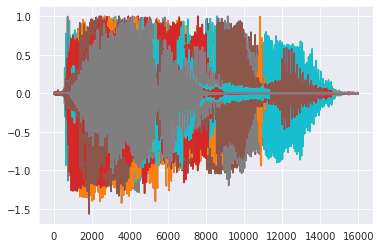

In [ ]:
iface = gr.Interface(fn=get_gradio , inputs=gr.Audio(source="microphone" ), 
                     outputs='text',
                     )

iface.launch(debug=True)